# Gradient Descent

In [6]:
import numpy as np
import matplotlib.pyplot as plt

Final model: y = 1.10x + 0.42


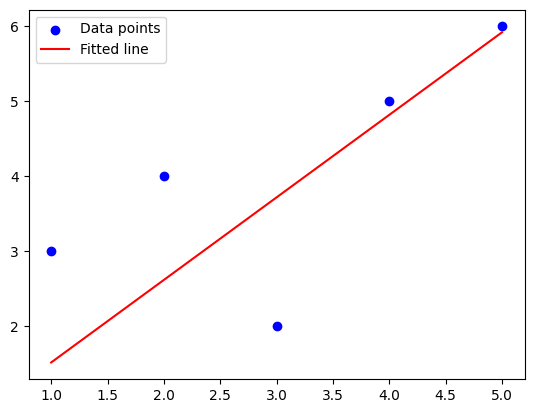

In [9]:
# sample data
x = np.array([1, 2, 3, 4, 5])
y = np.array([3, 4, 2, 5, 6])

# initializing the parameters
w = 0.0
b = 0.0
learning_rate = 0.01
epochs = 100

N = len(x)

for epoch in range(epochs):
    # predictions
    y_pred = w * x + b
    
    # computing the gradients
    dw = np.mean( (-2 / N) * (y - y_pred) * x)
    db = np.mean( (-2 / N) * (y - y_pred))
    
    # updating the parameters
    w -= learning_rate * dw
    b -= learning_rate * db
    
print(f"Final model: y = {w:.2f}x + {b:.2f}")

# visualization
plt.scatter(x, y, color='blue', label='Data points')
plt.plot(x, w * x + b, color='red', label='Fitted line')
plt.legend()
plt.show()

